<center><h1 style="color:#173F8A;"> Metodos para Ecuaciones Diferenciales, IMT3410, 2023-2 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

<h2 style="color:#03122E;text-align:center;"> Capitulo 1. Metodos para Ecuaciones Diferenciales Ordinarias<br> </h2>
<hr style="border:3px solid #E3AE00 "> </hr>

In [85]:
# Import libraries: 
# - numerical scientific computing NumPy
# - scientific computing
# - visualiazation in python
# - data analysis
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Ejemplo: Poligonos de Euler

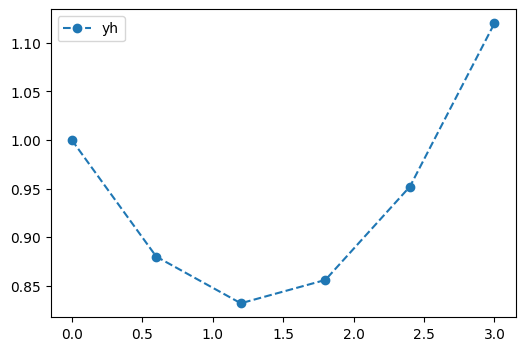

In [86]:
# Solucion de la ecuacion y' = f(x,y); y(0) = 1
y = lambda x: 0.1*(x-1)**2
f = lambda x,y:  0.1*2*(x-1)+0*y

# Iteration
x = np.linspace(0,3,6)
yh = np.zeros(x.size)
yh[0] = 1
for j in range(x.size-1):
    dxj = x[j+1]-x[j]
    yh[j+1] = yh[j] + dxj*f(x[j],yh[j])

fig, ax = plt.subplots(1,1, figsize=(6,4)) 
ax.plot(x,yh,'--o', label='yh')
ax.legend()
plt.show()

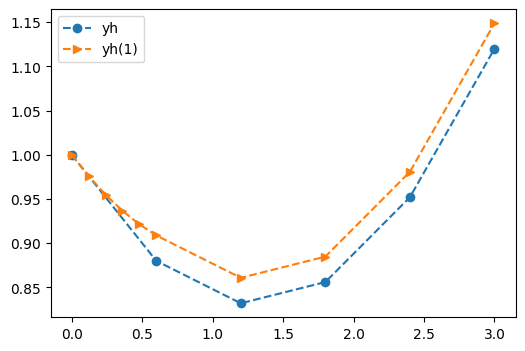

In [87]:
nref=6
x1 = np.concatenate((np.linspace(x[0],x[1], nref),x[2:]))
yh1 = np.zeros(x1.size)
yh1[0] = 1
for j in range(x1.size-1):
    dxj = x1[j+1]-x1[j]
    yh1[j+1] = yh1[j] + dxj*f(x1[j],yh1[j])
fig, ax = plt.subplots(1,1, figsize=(6,4)) 
ax.plot(x,yh,'--o', label='yh')
ax.plot(x1,yh1,'-->',label='yh(1)')
ax.legend()
plt.show()

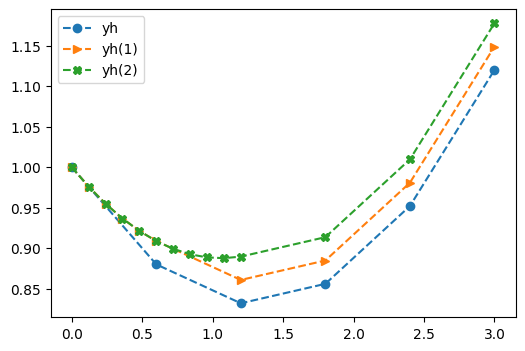

In [88]:
x2 = np.concatenate((x1[0:nref-1], np.linspace(x1[nref-1],x1[nref],nref),x1[nref+1:]))
yh2 = np.zeros(x2.size)
yh2[0] = 1
for j in range(x2.size-1):
    dxj = x2[j+1]-x2[j]
    yh2[j+1] = yh2[j] + dxj*f(x2[j],yh2[j])
fig, ax = plt.subplots(1,1, figsize=(6,4)) 
ax.plot(x,yh,'--o', label='yh')
ax.plot(x1,yh1,'-->',label='yh(1)')
ax.plot(x2,yh2,'--X',label='yh(2)')
ax.legend()
plt.show()

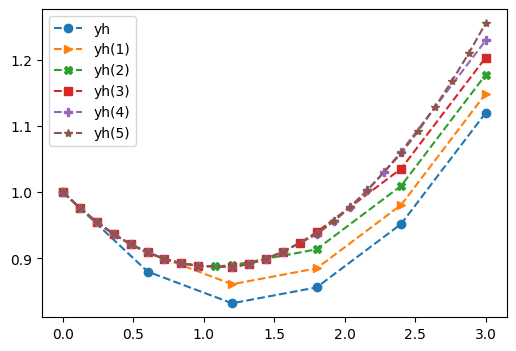

In [89]:
#
x3 = np.concatenate((x2[0:2*(nref-1)-1], np.linspace(x2[2*(nref-1)],x2[2*(nref-1)+1],nref),x2[2*nref:]))
yh3 = np.zeros(x3.size)
yh3[0] = 1
for j in range(x3.size-1):
    dxj = x3[j+1]-x3[j]
    yh3[j+1] = yh3[j] + dxj*f(x3[j],yh3[j])
#
x4 = np.concatenate((x3[0:3*(nref-1)-2], np.linspace(x3[3*(nref-1)-1],x3[3*(nref-1)],nref),x3[3*(nref-1)+1:]))
yh4 = np.zeros(x4.size)
yh4[0] = 1
for j in range(x4.size-1):
    dxj = x4[j+1]-x4[j]
    yh4[j+1] = yh4[j] + dxj*f(x4[j],yh4[j])
#
x5 = np.concatenate((x4[0:4*(nref-1)-3], np.linspace(x4[4*(nref-1)-2],x4[4*(nref-1)-1],nref)))
yh5 = np.zeros(x5.size)
yh5[0] = 1
for j in range(x5.size-1):
    dxj = x5[j+1]-x5[j]
    yh5[j+1] = yh5[j] + dxj*f(x5[j],yh5[j])

    
    
fig, ax = plt.subplots(1,1, figsize=(6,4)) 
ax.plot(x,yh,'--o', label='yh')
ax.plot(x1,yh1,'-->',label='yh(1)')
ax.plot(x2,yh2,'--X',label='yh(2)')
ax.plot(x3,yh3,'--s',label='yh(3)')
ax.plot(x4,yh4,'--P',label='yh(4)')
ax.plot(x5,yh5,'--*',label='yh(5)')
ax.legend()
plt.show()

## Ejemplo: Teorema de existencia de Peano
\begin{equation}
y' = 4\left( \mathrm{sign}(y) + \max (0, x-\frac{|y|}{x})\cos(\frac{\pi \log(x)}{\log(2)})\right)
\end{equation}

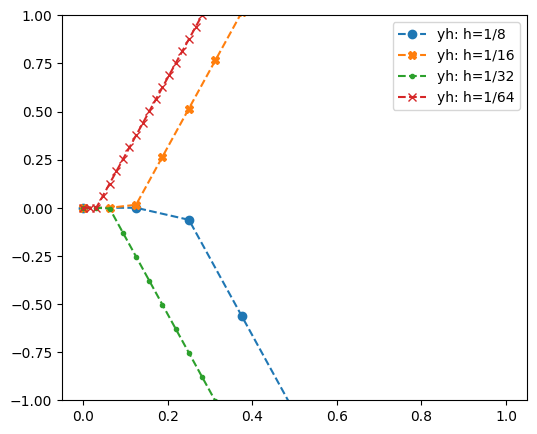

In [90]:
def funPeano(x,y):
    if x>0:
        return 4.0*(np.sign(y) + max(0,x-abs(y)/x)*np.cos(np.pi*np.log10(x)/np.log10(2.0)))
    else:
        return 4*np.sign(y)
i = 3
x3 = np.linspace(0,1, 2**i+1)
yh3 = np.zeros(x3.size)
yh3[0] = 0
for j in range(x3.size-1):
    dxj = x3[j+1]-x3[j]
    yh3[j+1] = yh3[j] + dxj*funPeano(x3[j],yh3[j])
#
i = 4
x4 = np.linspace(0,1, 2**i+1)
yh4 = np.zeros(x4.size)
yh4[0] = 0
for j in range(x4.size-1):
    dxj = x4[j+1]-x4[j]
    yh4[j+1] = yh4[j] + dxj*funPeano(x4[j],yh4[j])
#
i = 5
x5 = np.linspace(0,1, 2**i+1)
yh5 = np.zeros(x5.size)
yh5[0] = 0
for j in range(x5.size-1):
    dxj = x5[j+1]-x5[j]
    yh5[j+1] = yh5[j] + dxj*funPeano(x5[j],yh5[j])
#
i = 6
x6 = np.linspace(0,1, 2**i+1)
yh6 = np.zeros(x6.size)
yh6[0] = 0
for j in range(x6.size-1):
    dxj = x6[j+1]-x6[j]
    yh6[j+1] = yh6[j] + dxj*funPeano(x6[j],yh6[j])
#
fig, ax = plt.subplots(1,1, figsize=(6,5)) 
ax.plot(x3,yh3,'--o', label='yh: h=1/8')
ax.plot(x4,yh4,'--X', label='yh: h=1/16')
ax.plot(x5,yh5,'--.', label='yh: h=1/32')
ax.plot(x6,yh6,'--x', label='yh: h=1/64')
ax.set_ylim([-1,1])
ax.legend()
plt.show()

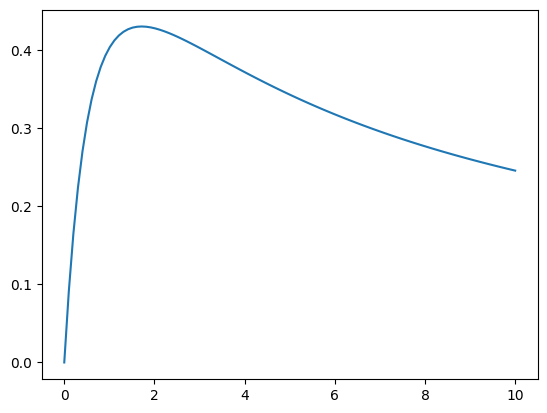

In [91]:
XM = lambda C: 1.0/(2.0*(1+C))*np.log(1+2*C*(1+C))
c=np.linspace(0,10,100)
plt.plot(c, XM(c))
plt.show()

# Metodo de Euler explicito

In [101]:
def Euler_explicito(odefun, t_span, y0, h=None, return_trajectory=False): 
    '''
    Metodo de Euler explicito
    Resuelve: dy/dy = odefun(t,y), y(t0) = y0
    Input  : odefun, t_span = (tiemp inicial, tiempo final)
             y0 condicion inicial, h paso en t, 
             return_trajectory returnar o no toda la trajectoria de la solucion
    Output : (t,y)
    '''
    t0, tf = t_span
    t = t0; y = y0
    if h is None: h = (tf-t0)/100
    yh = []; tn = [] 
    if return_trajectory: yh.append(y0); tn.append(0.0)
    
    while np.abs(t-tf)>1e-14:
        # Paso de Euler explicito
        y = y + h*odefun(t,y)
        t+=h
        if return_trajectory: yh.append(y); tn.append(t)
    if return_trajectory: 
        return (np.array(yh),tn) 
    else: 
        return y,t

## Ejemplo:
\begin{equation}
y' = 2x,\quad y(0) = 0 
\end{equation}

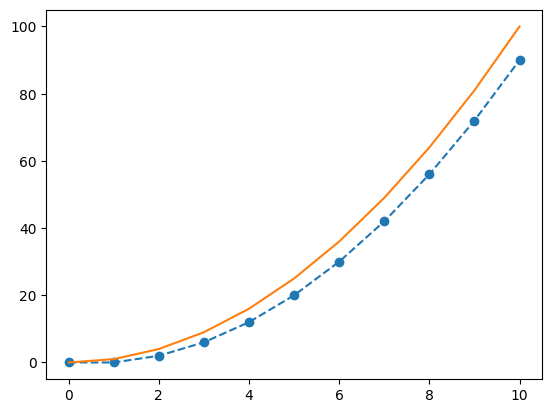

In [102]:
f1 = lambda x,y: 2*x + 0*y
y0 = 0

y10, x10 = Euler_explicito(odefun=f1, t_span=(0.0, 10.0), y0=0, h=1.0, return_trajectory=True)
yexact = lambda x: x**2
plt.plot(x10,y10,'--o')
plt.plot(x10,yexact(np.asarray(x10)))
plt.show()

## Ejemplo:
\begin{equation}
y' = \tan^{-1}(y),\quad y(0) = y_0 
\end{equation}

[1.         1.39269908 1.86673497 2.40623616 2.994699   3.61895641
 4.2695568  4.93992037 5.62545187 6.32288714 7.02985712]


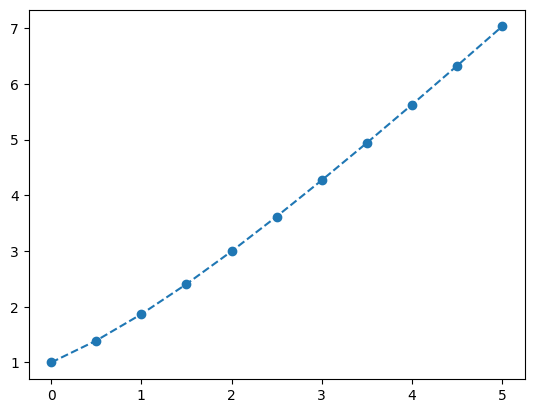

In [103]:
f1 = lambda x, y: np.arctan(y)
y0 = 1

# y10, x10 = Euler_explicito(f1, y0, 10, 5, 0)
y10, x10 = Euler_explicito(odefun=f1, t_span=(0.0, 5.0), y0=y0, h=.5, return_trajectory=True)

#yexact = lambda x: x**2
print(y10)
plt.plot(x10,y10,'--o')
#plt.plot(x10,yexact(np.asarray(x10)))
plt.show()

## Ejemplo 2:
\begin{equation}
y' = y^{2} - \frac{x^{4} - 6x^{3} + 12x^{2} - 14x + 9}{(1+x)^{2}},\quad y(0) = 2 
\end{equation}

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.5999999999999999]


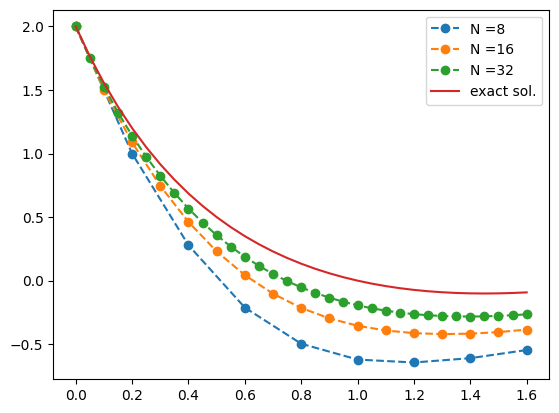

In [104]:
f2 = lambda x, y: y**2-(x**4-6*x**3 + 12*x**2 - 14*x + 9)/(1+x)**2
y0 = 2
yexact = lambda x: (1-x)*(2-x)/(1+x)
XM=1.6
y8, x8 = Euler_explicito(odefun=f2, t_span=(0.0, XM), y0=y0, h=XM/8.0, return_trajectory=True)
y16, x16 = Euler_explicito(odefun=f2, t_span=(0.0, XM), y0=y0, h=XM/16.0, return_trajectory=True)
y32, x32 = Euler_explicito(odefun=f2, t_span=(0.0, XM), y0=y0, h=XM/32.0, return_trajectory=True)

print(x8)
plt.plot(x8,y8, '--o', label='N =8')
plt.plot(x16,y16, '--o', label='N =16')
plt.plot(x32,y32, '--o', label='N =32')
plt.plot(x32, yexact(np.asarray(x32)), label='exact sol.')
plt.legend()
plt.show()

<hr style="border:3px solid #E3AE00 "> </hr>


# Clase 3

In [42]:
from scipy.optimize import newton

In [65]:
def Euler_implicito(odefun, t_span, y0, h=None, return_trajectory=False, odefunprime=None ): 
    '''
    Metodo de Euler implicito
    Resuelve: dy/dy = odefun(t,y), y(t0) = y0
    Input  : odefun, t_span = (tiemp inicial, tiempo final)
             y0 condicion inicial, h paso en t, 
             return_trajectory returnar o no toda la trajectoria de la solucion
    Output : (t,y)
    '''
    t0, tf = t_span
    t = t0; y = y0
    
    if h is None: h = (tf-t0)/100
    if return_trajectory: yh = []; tn = []; yh.append(y0); tn.append(0.0)
    if np.isscalar(y0): I = 1.0 
    else: I = np.eye(y0.size)
    
    F = lambda z,t0,y0: z-h*odefun(t0+h,z) - y0
    if odefunprime is not None: J = lambda z,t0,y0: I - h*odefunprime(t0+h,z)
    else: J = None
        
    while np.abs(t-tf)>1e-14:
        # Paso de Euler implicito
        y = newton(F, y0, fprime=J, args=(t,y))
        t+=h
        if return_trajectory: yh.append(y); tn.append(t)
            
    if return_trajectory: return (np.array(yh),np.array(tn)) 
    else: return y,t

## Ejemplo


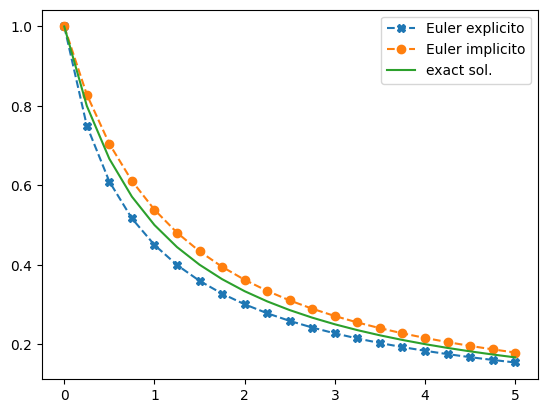

In [82]:
fun = lambda x,y : -y**2
dfundy = lambda x,y: -2*y
yexact = lambda x: 1.0/(1.0+x)

ye,te = Euler_explicito(odefun=fun, t_span=(0.0, 5.0), y0=1.0, h=5.0/20.0, return_trajectory=True)
y,t = Euler_implicito(odefun=fun, t_span=(0.0,5.0), y0=1.0, h=5.0/20.0, return_trajectory=True, odefunprime=dfundy)
#y,t = Euler_implicito(odefun=fun, t_span=(0.0,5.0), y0=1.0, h=5.0/20.0, return_trajectory=True)

plt.plot(te,ye, '--X', label='Euler explicito')
plt.plot(t,y, '--o', label='Euler implicito')
plt.plot(t, yexact(t), label='exact sol.')
plt.legend()
plt.show()

In [105]:
def trapezoidalrule(odefun, t_span, y0, h=None, return_trajectory=False, odefunprime=None ):
    '''
    Metodo de regla del trapecio
    Resuelve: dy/dy = odefun(t,y), y(t0) = y0
    Input  : odefun, t_span = (tiemp inicial, tiempo final)
             y0 condicion inicial, h paso en t, 
             return_trajectory returnar o no toda la trajectoria de la solucion
    Output : (t,y)
    '''
    t0, tf = t_span
    t = t0; y = y0
    if h is None: h = (tf-t0)/100
    if return_trajectory: yh = []; tn = []; yh.append(y0); tn.append(0.0)
    if np.isscalar(y0): I = 1.0 
    else: I = np.eye(y0.size)
    
    F = lambda z,t0,y0: z-0.5*h*(odefun(t0,y0)+odefun(t0+h,z)) - y0
    if odefunprime is not None: J = lambda z,t0,y0: I - 0.5*h*odefunprime(t0+h,z)*odefun(t0+h,z)
    else: J = None
    
    while np.abs(t-tf)>1e-14:
        # Paso de regla del trapecio
        y = newton(F, y0, fprime=J, args=(t,y))
        t+=h
        if return_trajectory: yh.append(y); tn.append(t)
            
    if return_trajectory: return (np.array(yh),np.array(tn)) 
    else: return y,t

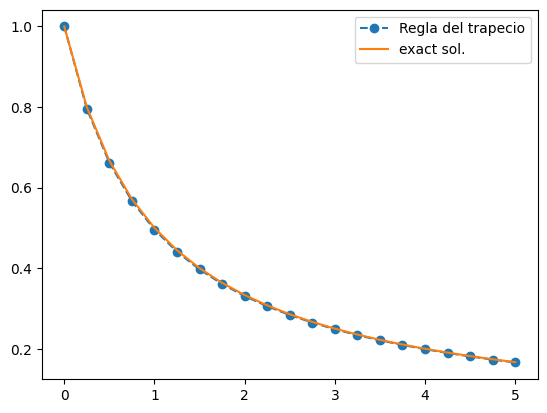

In [84]:
fun = lambda x,y : -y**2
dfundy = lambda x,y: -2*y
yexact = lambda x: 1.0/(1.0+x)

#y,t = Euler_implicito(odefun=fun, t_span=(0.0,5.0), y0=1.0, h=None, return_trajectory=True, odefunprime=dfundy)
y,t = trapezoidalrule(odefun=fun, t_span=(0.0,5.0), y0=1.0, h=5.0/20.0, return_trajectory=True)

plt.plot(t,y, '--o', label='Regla del trapecio')
plt.plot(t, yexact(t), label='exact sol.')
plt.legend()
plt.show()

## Ejemplo: Cuando todo va bien
\begin{alignat}{4}
y' &= - y + 2\exp(-x)\cos(2x) \\
y(0)& = 0 \\
h & = \frac{1}{2}, \frac{1}{10}, \frac{1}{50}.
\end{alignat}

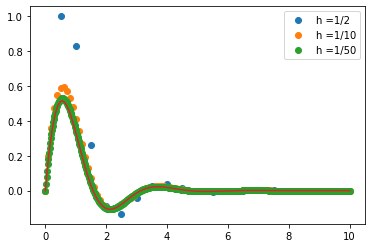

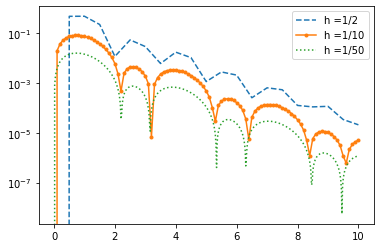

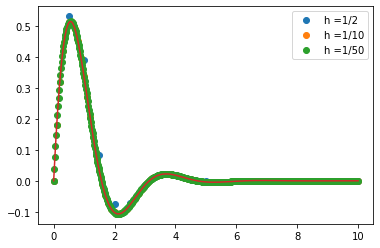

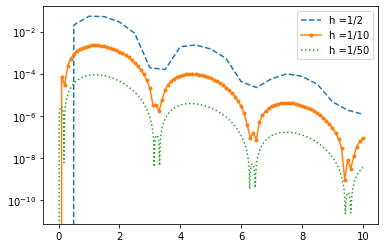

In [89]:
f3 = lambda x, y:-y + 2*np.exp(-x)*np.cos(2*x)
f3prime = lambda x,y: -1 +0*y+0*x # df/dy
y0 = 0
XM = 10
h = [0.5,0.1,0.02]
N = [int(XM/hi) for hi in h]

yexact = lambda x: np.exp(-x)*np.sin(2*x)
# Euler
yh1, xh1 = Euler_explicito(f3, y0, N=N[0], XM = XM, x0 =0)
yh2, xh2 = Euler_explicito(f3, y0, N=N[1], XM = XM, x0 =0)
yh3, xh3 = Euler_explicito(f3, y0, N=N[2], XM = XM, x0 =0)

# Trapezoidal
Th1, xh1 = trapezoidalrule(f3, y0, N=N[0], XM = XM, x0 =0, dfdy = f3prime)
Th2, xh2 = trapezoidalrule(f3, y0, N=N[1], XM = XM, x0 =0, dfdy = f3prime)
Th3, xh3 = trapezoidalrule(f3, y0, N=N[2], XM = XM, x0 =0, dfdy = f3prime)

# plots Euler
plt.plot(xh1,yh1, 'o', label='h =1/2')
plt.plot(xh2,yh2, 'o', label='h =1/10')
plt.plot(xh3,yh3, 'o', label='h =1/50')
plt.plot(xh3, yexact(np.asarray(xh3)))
plt.legend()
plt.show()

fig, ax = plt.subplots(1)
eh1 = np.abs(yexact(np.asarray(xh1))-yh1)
eh2 = np.abs(yexact(np.asarray(xh2))-yh2)
eh3 = np.abs(yexact(np.asarray(xh3))-yh3)
ax.semilogy(xh1,eh1, '--', label='h =1/2')
ax.semilogy(xh2,eh2, '.-', label='h =1/10')
ax.semilogy(xh3,eh3, ':', label='h =1/50')
ax.legend()
plt.show()

# plots trapezoidal
plt.plot(xh1,Th1, 'o', label='h =1/2')
plt.plot(xh2,Th2, 'o', label='h =1/10')
plt.plot(xh3,Th3, 'o', label='h =1/50')
plt.plot(xh3, yexact(np.asarray(xh3)))
plt.legend()
plt.show()

fig, ax = plt.subplots(1)
eh1 = np.abs(yexact(np.asarray(xh1))-Th1)
eh2 = np.abs(yexact(np.asarray(xh2))-Th2)
eh3 = np.abs(yexact(np.asarray(xh3))-Th3)
ax.semilogy(xh1,eh1, '--', label='h =1/2')
ax.semilogy(xh2,eh2, '.-', label='h =1/10')
ax.semilogy(xh3,eh3, ':', label='h =1/50')
ax.legend()
plt.show()

## Ejemplo: Cuando falla
\begin{alignat}{4}
y' &= \log(3)(y - [y]-3/2) \\
y(0)& = 0 \\
h & = \frac{1}{100}, \frac{1}{1000}.
\end{alignat}

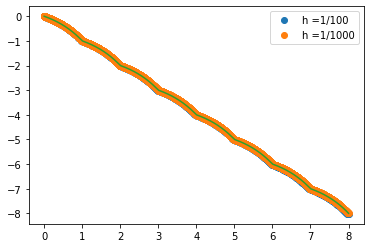

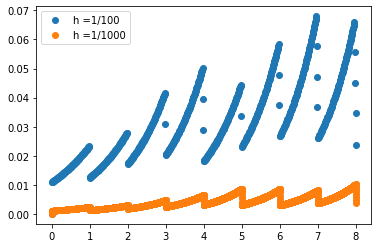

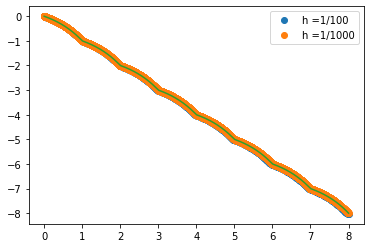

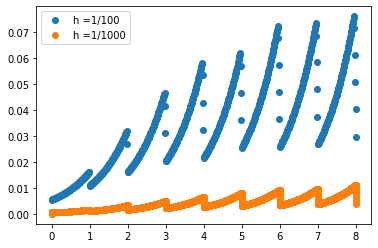

In [93]:
f4 = lambda x, y: np.log(3)*(y-np.floor(y)-1.5 )

y0 = 0
XM = 8
h = [0.01,0.001]
N = [int(XM/hi) for hi in h]

yexact = lambda x: -np.floor(x) + 0.5*(1-3**(x-np.floor(x)))
# Euler
yh1, xh1 = Euler_explicito(f4, y0, N=N[0], XM = XM, x0 =0)
yh2, xh2 = Euler_explicito(f4, y0, N=N[1], XM = XM, x0 =0)

plt.plot(xh1,yh1, 'o', label='h =1/100')
plt.plot(xh2,yh2, 'o', label='h =1/1000')
plt.plot(xh2, yexact(np.asarray(xh2)))
plt.legend()
plt.show()

fig, ax = plt.subplots(1)
eh1 = np.abs(yexact(np.asarray(xh1))-yh1)
eh2 = np.abs(yexact(np.asarray(xh2))-yh2)
ax.plot(xh1,eh1, 'o', label='h =1/100')
ax.plot(xh2,eh2, 'o', label='h =1/1000')
ax.legend()
plt.show()

# Trapezoidal
Th1, xh1 = trapezoidalrule(f4, y0, N=N[0], XM = XM, x0 =0)
Th2, xh2 = trapezoidalrule(f4, y0, N=N[1], XM = XM, x0 =0)

plt.plot(xh1,Th1, 'o', label='h =1/100')
plt.plot(xh2,Th2, 'o', label='h =1/1000')
plt.plot(xh2, yexact(np.asarray(xh2)))
plt.legend()
plt.show()

fig, ax = plt.subplots(1)
eh1 = np.abs(yexact(np.asarray(xh1))-Th1)
eh2 = np.abs(yexact(np.asarray(xh2))-Th2)
ax.plot(xh1,eh1, 'o', label='h =1/100')
ax.plot(xh2,eh2, 'o', label='h =1/1000')
ax.legend()
plt.show()

## Clase 4

### Ejemplo: Convergencia
\begin{equation}
y' = -y^{2},\qquad y(0) = 1
\end{equation}

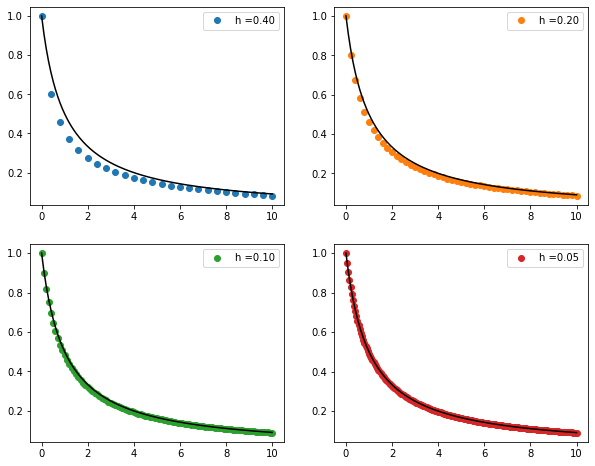

In [53]:
fun = lambda x,y : -y**2
dfundy = lambda x,y: -2*y
y0 = 1
XM = 10
h = [0.4, 0.2, 0.1, 0.05, 0.025, 0.0125]
N = [int(XM/hi) for hi in h]

yexact = lambda x: 1.0/(1.0+x)
YH = []
XH = []
# Euler
for i,hi in enumerate(h):
    yh, xh = Euler_explicito(fun, y0, N=N[i], XM = XM, x0 =0)
    YH.append(yh)
    XH.append(xh)

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(XH[0],YH[0], 'o', color='C00',label='h =%.2f'%h[0])
ax[0,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,0].legend()
ax[0,1].plot(XH[1],YH[1], 'o', color='C01',label='h =%.2f'%h[1])
ax[0,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,1].legend()
ax[1,0].plot(XH[2],YH[2], 'o', color='C02',label='h =%.2f'%h[2])
ax[1,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,0].legend()
ax[1,1].plot(XH[3],YH[3], 'o', color='C03',label='h =%.2f'%h[3])
ax[1,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,1].legend()
plt.show()

## Compute error 
EH = []
EOC = ['-']
for i,hi in enumerate(h):
    eh = np.max(np.abs(yexact(np.asarray(XH[i]))-YH[i]))
    EH.append(eh)
    if i>0:
        EOC.append(np.log(EH[i]/EH[i-1])/np.log(h[i]/h[i-1]))
        
        
# Trapezoidal rule
TH = []
XH = []
for i,hi in enumerate(h):
    th, xh = trapezoidalrule(fun, y0, N=N[i], XM = XM, x0 =0, dfdy=dfundy)
    TH.append(th)
    XH.append(xh)
## Compute error 
EHT = []
EOCT = ['-']
for i,hi in enumerate(h):
    eh = np.max(np.abs(yexact(np.asarray(XH[i]))-TH[i]))
    EHT.append(eh)
    if i>0:
        EOCT.append(np.log(EHT[i]/EHT[i-1])/np.log(h[i]/h[i-1]))

In [54]:
df = pd.DataFrame({'h':h, 'Euler error':EH, 'Euler eoc':EOC,  'Trap. error':EHT, 'Trap. eoc':EOCT})
df

,h,Euler error,Euler eoc,Trap. error,Trap. eoc
0,0.4000,0.114286,-,0.012724,-
1,0.2000,0.043317,1.39965,0.002979,2.0946
2,0.1000,0.019836,1.12683,0.000744,2.0011
3,0.0500,0.009532,1.05731,0.000185,2.00502
4,0.0250,0.004680,1.02612,0.000046,2.00125
5,0.0125,0.002319,1.01279,0.000012,2.00031


## Metodos de paso multiple

In [63]:
def simpsonmult(f, y0, y1, N, XM, x0=0, dfdy=None):
    h = (XM- x0)/N
    yn = y0
    x = []
    y = []
    x.append(x0)
    x.append(x0+h)
    y.append(y0)
    y.append(y1)
    xn = x0
    
    xnm1 = 0
    xn   = 0+h 
    ynm1 = y0
    yn   = y1
    for n in range(2,N+1):
        
        F = lambda y: y - ynm1 - h/3.0*(f(xn-h,ynm1)+4*f(xn,yn)+f(xn+h, y))
        if dfdy is None:
            Fprime = None
        else:
            Fprime = lambda y: 1 - h/3.0*dfdy(xn+h,y)
        ynp1 = newton(F, x0=yn+h*f(xn,yn), fprime=Fprime)
        xn = xn+h
        x.append(xn)
        y.append(ynp1)
        
        ynm1 = yn; 
        yn = ynp1
    return y, x

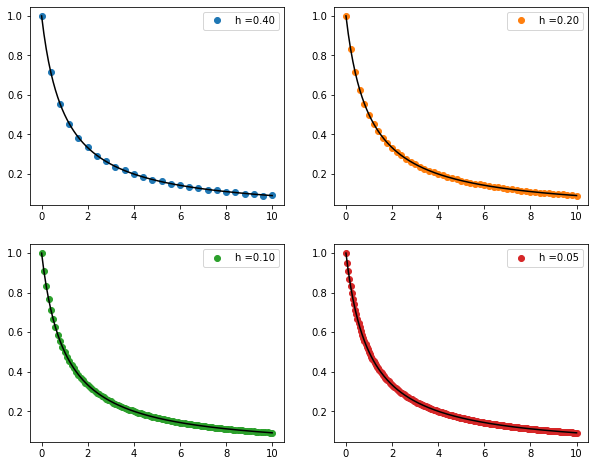

,h,Simpson error,Simpson eoc
0,0.4000,3.503557e-03,-
1,0.2000,2.466939e-04,3.82803
2,0.1000,1.158533e-05,4.41235
3,0.0500,5.108886e-07,4.50315
4,0.0250,3.029583e-08,4.07582
5,0.0125,1.833675e-09,4.04631


In [66]:
YH = []
XH = []
# Simpson rule paso multiple

for i,hi in enumerate(h):
    y1 = 1.0/(1.0+hi)
    yh, xh = simpsonmult(fun, y0,y1, N=N[i], XM = XM, x0 =0, dfdy=dfundy)
    YH.append(yh)
    XH.append(xh)

## Compute error 
EH = []
EOC = ['-']
for i,hi in enumerate(h):
    eh = np.max(np.abs(yexact(np.asarray(XH[i]))-YH[i]))
    EH.append(eh)
    if i>0:
        EOC.append(np.log(EH[i]/EH[i-1])/np.log(h[i]/h[i-1]))
        
fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(XH[0],YH[0], 'o', color='C00',label='h =%.2f'%h[0])
ax[0,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,0].legend()
ax[0,1].plot(XH[1],YH[1], 'o', color='C01',label='h =%.2f'%h[1])
ax[0,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,1].legend()
ax[1,0].plot(XH[2],YH[2], 'o', color='C02',label='h =%.2f'%h[2])
ax[1,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,0].legend()
ax[1,1].plot(XH[3],YH[3], 'o', color='C03',label='h =%.2f'%h[3])
ax[1,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,1].legend()
plt.show()


df = pd.DataFrame({'h':h, 'Simpson error':EH, 'Simpson eoc':EOC})
df

## Cero-Estable ( o no estables)

### Ejemplo:
\begin{equation}
y_{n+3} + y_{n+2} - y_{n+1} - y_{n} = 2h(f_{n+2}+f_{n+1})
\end{equation}

In [70]:
def methodmulti8(f, y0, y1, y2, N, XM, x0=0 ):
    h = (XM- x0)/N
    yn = y0
    x = []
    y = []
    x.append(x0)
    x.append(x0+h)
    x.append(x0+2*h)
    y.append(y0)
    y.append(y1)
    y.append(y2)

    xn   = 0
    xnp1 = 0 +h
    xnp2 = 0 +2*h
    yn   = y0
    ynp1 = y1
    ynp2 = y2
    for n in range(2,N+1):
        xnp3 = xn+3*h
        ynp3 = -ynp2 + ynp1 + yn + 2*h*(f(xn+2*h,ynp2)+f(xn+h, ynp1))
        x.append(xnp3)
        y.append(ynp3)
        
        yn   = ynp1; xn   = xnp1; 
        ynp1 = ynp2; xnp1 = xnp2;
        ynp2 = ynp3; xnp2 = xnp3;
    return y, x

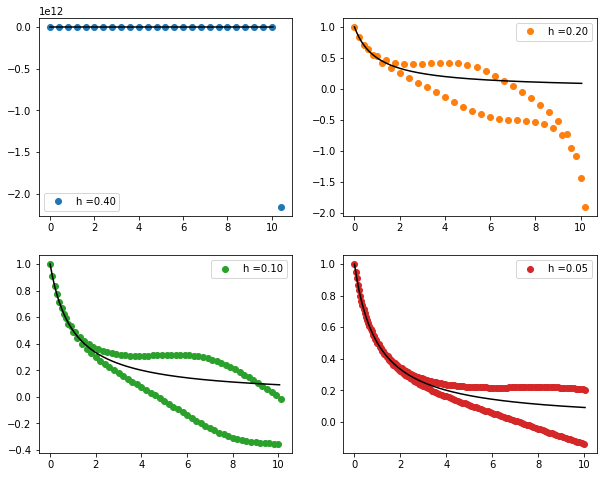

,h,MM8 error,Simpson eoc
0,0.4000,2.156879e+12,-
1,0.2000,1.984081e+00,39.9836
2,0.1000,4.458069e-01,2.15398
3,0.0500,2.306141e-01,0.950938
4,0.0250,6.493557e-02,1.8284
5,0.0125,1.650251e-02,1.97632


In [75]:
YH = []
XH = []
# Simpson rule paso multiple

for i,hi in enumerate(h):
    y1 = yexact(hi)
    y2 = yexact(2*hi)
    yh, xh = methodmulti8(fun, y0,y1,y2, N=N[i], XM = XM, x0 =0)
    YH.append(yh)
    XH.append(xh)

## Compute error 
EH = []
EOC = ['-']
for i,hi in enumerate(h):
    eh = np.max(np.abs(yexact(np.asarray(XH[i]))-YH[i]))
    EH.append(eh)
    if i>0:
        EOC.append(np.log(EH[i]/EH[i-1])/np.log(h[i]/h[i-1]))
        
fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(XH[0],YH[0], 'o', color='C00',label='h =%.2f'%h[0])
ax[0,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,0].legend()
ax[0,1].plot(XH[1],YH[1], 'o', color='C01',label='h =%.2f'%h[1])
ax[0,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,1].legend()
ax[1,0].plot(XH[2],YH[2], 'o', color='C02',label='h =%.2f'%h[2])
ax[1,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,0].legend()
ax[1,1].plot(XH[3],YH[3], 'o', color='C03',label='h =%.2f'%h[3])
ax[1,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,1].legend()
plt.show()


df = pd.DataFrame({'h':h, 'MM8 error':EH, 'Simpson eoc':EOC})
df

In [77]:
A = np.array([[1,1,0,0],[0,1,-1,-1],[0,0.5,0,-1],[0,1.0/6.0,0,-0.5]])
b = np.array([-1,-2,-2,-4.0/3.0])
x = np.linalg.solve(A,b)
print(x)

[-5.  4.  2.  4.]


In [103]:
def best2stepsmethod(f, y0, y1, N, XM, x0=0 ):
    # Metodo de 2 pasos explicito de orden mas alto
    h = (XM-x0)/N
    yn = y0
    x = []
    y = []
    x.append(x0)
    x.append(x0+h)
    y.append(y0)
    y.append(y1)

    xn   = 0
    xnp1 = 0 +h
    yn   = y0
    ynp1 = y1
    for n in range(2,N+1):
        xnp2 = xn+2*h
        ynp2 = -4*ynp1 + 5*yn + h*(4*f(xn+h,ynp1)+2*f(xn, yn))
        if np.abs(ynp2)>10**4:
            return y, x
        x.append(xnp2)
        y.append(ynp2)
        
        yn   = ynp1; xn   = xnp1; 
        ynp1 = ynp2; xnp1 = xnp2;
    return y, x

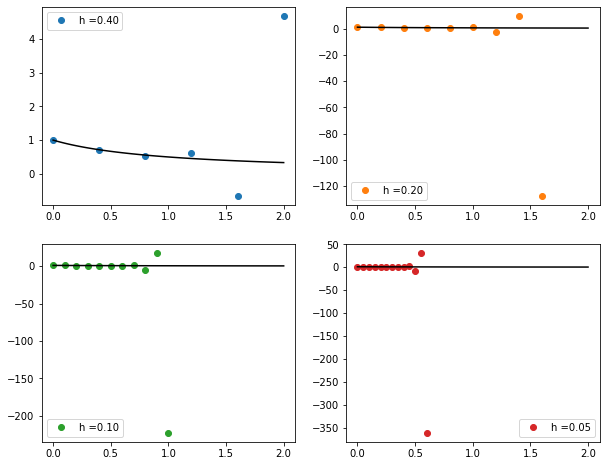

In [104]:
YH = []
XH = []
# Metodo de 2 pasos explicito de orden mas alto
h = [0.4, 0.2, 0.1, 0.05]#, 0.025, 0.0125]
XM = 2.0
xplot = np.linspace(0,XM,100)
N = [int(XM/hi) for hi in h]
for i,hi in enumerate(h):
    y1 = yexact(hi)
    y2 = yexact(2*hi)
    yh, xh = best2stepsmethod(fun, y0, y1, N=N[i], XM = XM, x0 =0)
    YH.append(yh)
    XH.append(xh)

## Compute error 
EH = []
EOC = ['-']
for i,hi in enumerate(h):
    eh = np.max(np.abs(yexact(np.asarray(XH[i]))-YH[i]))
    EH.append(eh)
    if i>0:
        EOC.append(np.log(EH[i]/EH[i-1])/np.log(h[i]/h[i-1]))
        
fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(XH[0],YH[0], 'o', color='C00',label='h =%.2f'%h[0])
ax[0,0].plot(xplot, yexact(xplot),'k')
ax[0,0].legend()
ax[0,1].plot(XH[1],YH[1], 'o', color='C01',label='h =%.2f'%h[1])
ax[0,1].plot(xplot, yexact(xplot),'k')
ax[0,1].legend()
ax[1,0].plot(XH[2],YH[2], 'o', color='C02',label='h =%.2f'%h[2])
ax[1,0].plot(xplot, yexact(xplot),'k')
ax[1,0].legend()
ax[1,1].plot(XH[3],YH[3], 'o', color='C03',label='h =%.2f'%h[3])
ax[1,1].plot(xplot, yexact(xplot),'k')
ax[1,1].legend()
plt.show()


# Clase 5

### Ejemplo de problema stiff trivial
\begin{equation}
y' = \lambda y, \quad y(0) = 1, \quad \lambda = -20. \quad \mbox{Solucion: } y(x) = \exp(-20 x)
\end{equation}


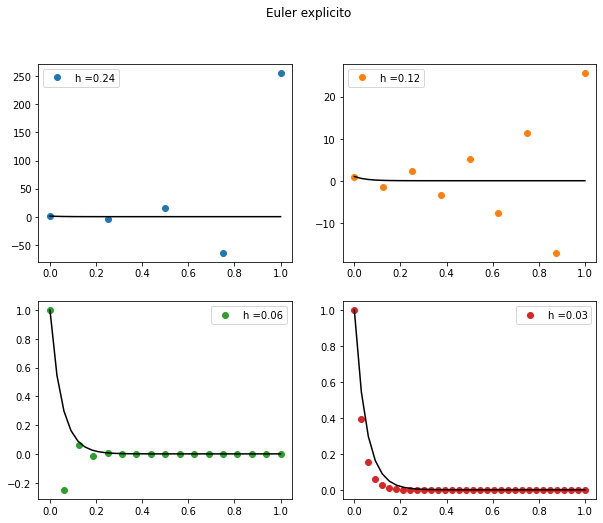

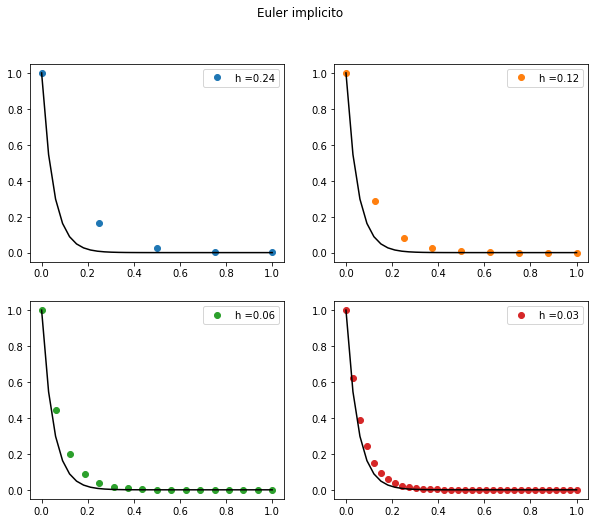

In [18]:
fstiff1 = lambda x,y : -20*y
dfstiff1dy = lambda x,y: -20
y0 = 1
XM = 1
h = [0.24, 0.12, 0.06, 0.03]
N = [int(XM/hi) for hi in h]

yexact = lambda x: np.exp(-20*x)
YH = []
XH = []
YHi = []
# Euler
for i,hi in enumerate(h):
    yh, xh = Euler_explicito(fstiff1, y0, N=N[i], XM = XM, x0 =0)
    yhi, xh = Euler_implicito(fstiff1, y0, N=N[i], XM = XM, x0 =0)
    YH.append(yh)
    XH.append(xh)
    YHi.append(yhi)

fig, ax = plt.subplots(2,2, figsize=(10,8))
fig.suptitle('Euler explicito')
ax[0,0].plot(XH[0],YH[0], 'o', color='C00',label='h =%.2f'%h[0])
ax[0,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,0].legend()
ax[0,1].plot(XH[1],YH[1], 'o', color='C01',label='h =%.2f'%h[1])
ax[0,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,1].legend()
ax[1,0].plot(XH[2],YH[2], 'o', color='C02',label='h =%.2f'%h[2])
ax[1,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,0].legend()
ax[1,1].plot(XH[3],YH[3], 'o', color='C03',label='h =%.2f'%h[3])
ax[1,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,1].legend()
plt.show()

figi, axi = plt.subplots(2,2, figsize=(10,8))
figi.suptitle('Euler implicito')
axi[0,0].plot(XH[0],YHi[0], 'o', color='C00',label='h =%.2f'%h[0])
axi[0,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
axi[0,0].legend()
axi[0,1].plot(XH[1],YHi[1], 'o', color='C01',label='h =%.2f'%h[1])
axi[0,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
axi[0,1].legend()
axi[1,0].plot(XH[2],YHi[2], 'o', color='C02',label='h =%.2f'%h[2])
axi[1,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
axi[1,0].legend()
axi[1,1].plot(XH[3],YHi[3], 'o', color='C03',label='h =%.2f'%h[3])
axi[1,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
axi[1,1].legend()
plt.show()


### Ejemplo de problema stiff sistema
\begin{equation}
y' = A y, \quad y(0) = (1,4)^{\top}, \quad 
A= 
\begin{pmatrix}
-8003 & 1999 \\
23988 & -6004 
\end{pmatrix}
 \quad \mbox{Solucion: } y(x) = (\exp(-7 x), 4 \exp(-7x))^{\top}
\end{equation}


In [20]:
A = np.array([[-8003, 1999],[23988, -6004]], dtype=np.float64)
eigenvaluesA, eigenvectorsA = np.linalg.eig(A)
print(eigenvaluesA)

[-1.4e+04 -7.0e+00]


In [94]:
Fstiff1 = lambda x, Y: A.dot(Y)
dFstiff1dy = lambda x, Y: A 

Y0 = np.array([1.0,4.0], dtype=np.float64)
XM = 0.08
h = [0.004]
N = [20]

Yexact = lambda x: np.array([np.exp(-7*x), 4*np.exp(-7*x)])
YH = []
XH = []
YHi = []
# Euler
for i,hi in enumerate(h):
    yh, xh = Euler_explicito_multivariate(Fstiff1, Y0, N=N[i], XM = XM, x0 =0)
    yhi, xh = Euler_implicito_multivariate(Fstiff1, Y0, N=N[i], XM = XM, x0 =0,dfdy = dFstiff1dy)
    YH.append(yh)
    XH.append(xh)
    YHi.append(yhi)

df = pd.DataFrame({'x': xh, 'y_1':[Yexact(xhi)[0] for xhi in xh], 'Euler Explicito':np.asarray(yh)[:,0], 'Euler implicito':np.asarray(yhi)[:,0]})
df

,x,y_1,Euler Explicito,Euler implicito
0,0.000,1.000000,1.000000e+00,1.000000
1,0.004,0.972388,9.720000e-01,0.972763
2,0.008,0.945539,9.447840e-01,0.946267
3,0.012,0.919431,9.183300e-01,0.920493
4,0.016,0.894044,8.926168e-01,0.895422
5,0.020,0.869358,8.676235e-01,0.871033
6,0.024,0.845354,8.433301e-01,0.847308
7,0.028,0.822012,8.197164e-01,0.824230
8,0.032,0.799315,7.967862e-01,0.801780
9,0.036,0.777245,7.732788e-01,0.779941


In [95]:
def Euler_explicito_multivariate(f, y0, N, XM, x0=0):
    h = (XM- x0)/N
    yn = y0.copy()
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    xn = x0

    for n in range(1,N+1):
        yn = yn + h * f(xn,yn)
        xn = x0+h*n
        x.append(xn)
        y.append(yn)
    return y, x
def Euler_implicito_multivariate(f, y0, N, XM, x0=0, dfdy=None):
    h = (XM- x0)/N
    yn = y0
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    xn = x0
    
    if np.isscalar(y0):
        I = 1.0
    else:
        I = np.eye(y0.size)
    for n in range(1,N+1):
        F = lambda y: np.array([y[0] - yn[0] - h*f(xn+h,y)[0], y[1] - yn[1] - h*f(xn+h,y)[1]])
        if dfdy is None:
            Fprime = None
        else:
            Fprime = lambda y: I - h*dfdy(xn+h,y)
        yn,_ = newton_multivariate(F, X0=yn+h*f(xn,yn), Fprime=Fprime)
        xn = x0+h*n
        x.append(xn)
        y.append(yn)
    return y, x
def newton_multivariate(F, X0, Fprime, maxiter=50, tol=1e-8):
    i = 0
    error = 1.0
    X = X0
    
    while np.any(abs(error)>tol) and i <maxiter:
        funeval = F(X)
        Jac = Fprime(X)
        Xnew = X - np.linalg.solve(Jac, funeval)
        error = Xnew-X
        X = Xnew
        i += 1
    return X, F(X)

In [186]:
def plot_stability_region_multistep(a,b, xinter=[-3,0.5], yinter=[-3,3]):
    
    #a : coefficients

    nx, ny = (100, 200)
    x = np.linspace(xinter[0], xinter[1], nx)
    y = np.linspace(yinter[0], yinter[1], ny)
    xv, yv = np.meshgrid(x, y)
    A = np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            z = x[i] +1j*y[j]
            ceval = [evalcoeff(z,a[k],b[k]) for k in range(len(a))]
            Z = np.roots(np.flip(np.asarray(ceval)))
            if np.any(np.abs(Z)>1):
                A[i,j] = -1 # no estable
            else:
                A[i,j] = 1
    plt.contourf(x, y, A.T, cmap='bone')
    return A
def evalcoeff(z,ak,bk):
    return ak -z*bk

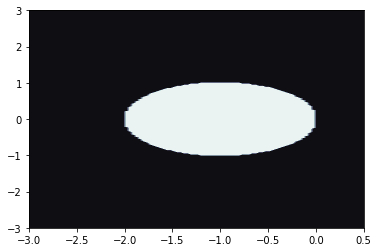

In [187]:
# Euler explicito
a = [-1.0,1.0]
b = [1.0,.0]
A_eulerimplicito = plot_stability_region_multistep(a,b)


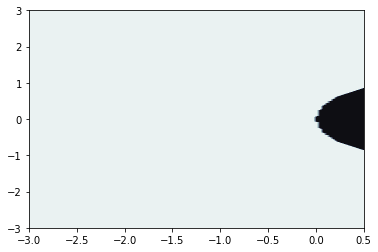

In [188]:
# Euler implicito
a = [-1.0,1.0]
b = [0,1.0]
A_implicito = plot_stability_region_multistep(a,b)

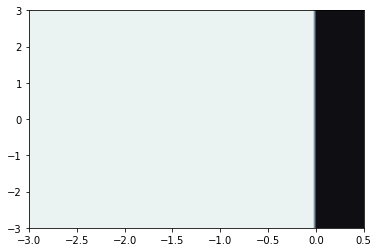

In [189]:
# trapezoidal
a = [-1.0,1.0]
b = [1.0/2.0,1.0/2.0]
A_trap = plot_stability_region_multistep(a,b)

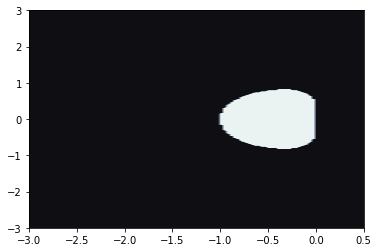

In [190]:
# A-B2
a = [0,-1.0,1.0]
b = [-1.0/2.0,3.0/2.0,0]
A_AB2 = plot_stability_region_multistep(a,b)

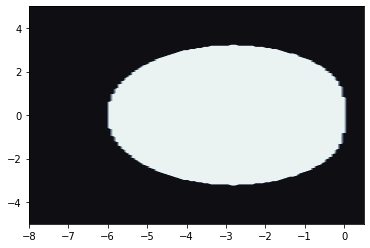

In [192]:
# A-M2
a = [0,-1.0,1.0]
b = [-1.0/12.0,2.0/3.0,5.0/12.0]
A_AM2 = plot_stability_region_multistep(a,b,xinter=[-8,0.5], yinter=[-5,5])

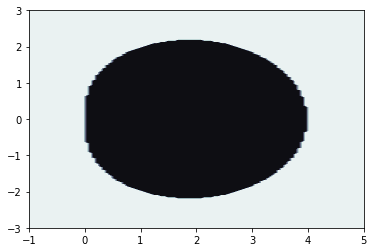

In [203]:
# BDF2 
a = [1,-4.0,3.0]
b = [0,0,2]
A_BDF2 = plot_stability_region_multistep(a,b,xinter=[-1,5], yinter=[-3,3])

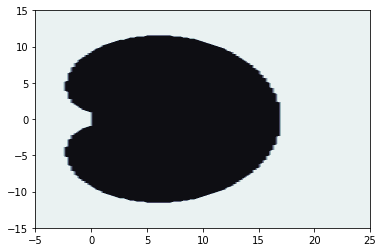

In [202]:
# BDF5 
a = [-12, 75,-200,300,-300,137]
b = [0,0,0,0,0,60]
A_BDF5 = plot_stability_region_multistep(a,b,xinter=[-5,25], yinter=[-15,15])